# Machine Learning Visualization 5

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import time
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bank-loan-modelling/Bank_Personal_Loan_Modelling.xlsx


In [2]:
df = pd.read_excel("/kaggle/input/bank-loan-modelling/Bank_Personal_Loan_Modelling.xlsx","Data")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_values = pd.DataFrame({'percent_missing': percent_missing})
missing_values.sort_values(by ='percent_missing' , ascending=False)

,percent_missing
ID,0.0
Age,0.0
Experience,0.0
Income,0.0
ZIP Code,0.0
Family,0.0
CCAvg,0.0
Education,0.0
Mortgage,0.0
Personal Loan,0.0


In [4]:
X = df.drop(['Personal Loan'], axis=1)
X = StandardScaler().fit_transform(X)
Y = df['Personal Loan'].values
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, random_state = 101)

In [5]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_Train, Y_Train)
y_pred = clf.predict(X_Test)
accuracy_score(Y_Test, y_pred)

0.9093333333333333

## PCA Reduction 

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
PCA_df = pd.concat([PCA_df, df['Personal Loan']], axis = 1)
PCA_df.head()

,PC1,PC2,Personal Loan
0,1.985794,-1.535796,0
1,-0.181320,-0.454738,0
2,0.121729,-1.200705,0
3,1.386027,-0.204013,0
4,0.698128,-1.669974,0


In [7]:
X = PCA_df.drop(['Personal Loan'], axis=1)
X = StandardScaler().fit_transform(X)
Y = PCA_df['Personal Loan'].values
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, random_state = 101)

In [8]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_Train, Y_Train)
y_pred = clf.predict(X_Test)
accuracy_score(Y_Test, y_pred)

0.9026666666666666

### Mlxtend

/opt/conda/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:249: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.

/opt/conda/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:249: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.

/opt/conda/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:249: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.

/opt/conda/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:249: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



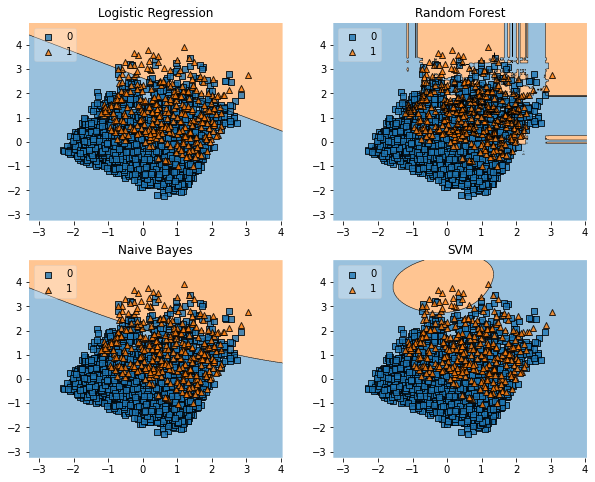

In [9]:
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

clf1 = LogisticRegression(random_state=1,
                          solver='newton-cg',
                          multi_class='multinomial')
clf2 = RandomForestClassifier(random_state=1, n_estimators=100)
clf3 = GaussianNB()
clf4 = SVC(gamma='auto')

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_Train, Y_Train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X_Train, Y_Train, clf=clf, legend=2)
    plt.title(lab)

plt.savefig("boundaries.png", dpi=300)
plt.show()

### Yellowbrick

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



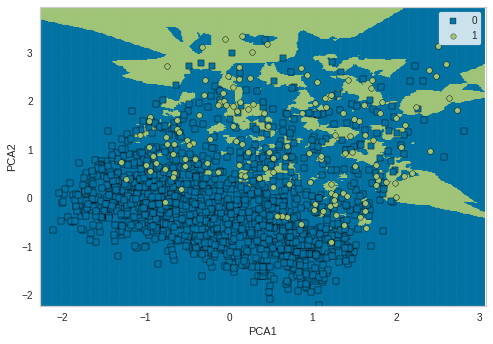

In [10]:
from yellowbrick.contrib.classifier import DecisionViz
from sklearn.neighbors import KNeighborsClassifier

viz = DecisionViz(
    KNeighborsClassifier(3), title="Nearest Neighbors",
    features=['PCA1', 'PCA2'], classes=['0', '1']
)
viz.fit(X_Train, Y_Train)
viz.draw(X_Test, Y_Test)
viz.show()

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



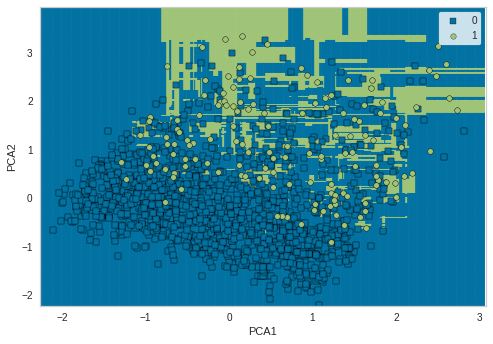

In [11]:
viz = DecisionViz(
    RandomForestClassifier(3), title="Random Forest",
    features=['PCA1', 'PCA2'], classes=['0', '1']
)
viz.fit(X_Train, Y_Train)
viz.draw(X_Test, Y_Test)
viz.show()

### Sklearn

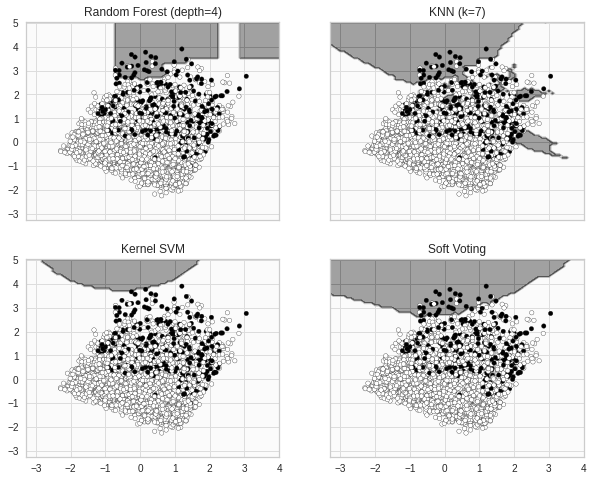

In [12]:
from itertools import product

clf1 = RandomForestClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=.1, kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('rf', clf1), ('knn', clf2),
                                    ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

clf1.fit(X_Train, Y_Train)
clf2.fit(X_Train, Y_Train)
clf3.fit(X_Train, Y_Train)
eclf.fit(X_Train, Y_Train)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Random Forest (depth=4)', 'KNN (k=7)',
                         'Kernel SVM', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X_Train[:, 0], X_Train[:, 1], c=Y_Train,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

### Plotly

In [13]:
# Following https://www.kaggle.com/arthurtok/decision-boundaries-visualised-via-python-plotly
from plotly import tools
import plotly.offline as py

trees = RandomForestClassifier(max_depth=4, n_estimators=20, random_state=0)
trees.fit(X_Train, Y_Train)
h = 0.02

trees_overfit = RandomForestClassifier(max_depth=50, n_estimators=5, random_state=0)
trees_overfit.fit(X_Train, Y_Train)

x_min, x_max = X_Train[:, 0].min() - 1, X_Train[:, 0].max() + 1
y_min, y_max = X_Train[:, 1].min() - 1, X_Train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h)
                     , np.arange(y_min, y_max, h))
y_ = np.arange(y_min, y_max, h)

Z = trees.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
#Z = Z.reshape((xx.shape[0], xx.shape[1], 3))

fig = tools.make_subplots(rows=1, cols=2,
                          subplot_titles=("Random Forest (Depth = 4)",
                                          "Random Forest (Depth = 50)")
                         )

trace1 = go.Heatmap(x=xx[0], y=y_, z=Z,
                  colorscale='Viridis',
                  showscale=False)

trace2 = go.Scatter(x=X_Train[:, 0], y=X_Train[:, 1], 
                    mode='markers',
                    showlegend=False,
                    marker=dict(size=10,
                                color=Y_Train, 
                                colorscale='Viridis',
                                line=dict(color='black', width=1))
                    )
                  
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 1)

Z = trees_overfit.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


trace3 = go.Heatmap(x=xx[0], y=y_, 
                    z=Z,
                    colorscale='Viridis',
                    showscale=True)

trace4 = go.Scatter(x=X_Train[:, 0], y=X_Train[:, 1],
                    mode='markers',
                    showlegend=False,
                    marker=dict(size=10,
                                color=Y_Train, 
                                colorscale='Viridis',
                                line=dict(color='black', width=1))
                   )
fig.append_trace(trace3, 1, 2)
fig.append_trace(trace4, 1, 2)

for i in map(str, range(1, 3)):
    x = 'xaxis' + i
    y2 = 'yaxis' + i
    fig['layout'][x].update(showgrid=False, zeroline=False,
                                   showticklabels=False, ticks='', autorange=True)
    fig['layout'][y2].update(showgrid=False, zeroline=False,
                                   showticklabels=False, ticks='', autorange=True)

py.iplot(fig)

/opt/conda/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



### PCA Plot

In [14]:
def forest_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, random_state = 101)
    start = time.process_time()
    trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
    print(time.process_time() - start)
    predictionforest = trainedforest.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionforest))
    print(classification_report(Y_Test,predictionforest))

In [15]:
def complete_test_2D(X, Y, plot_name = ''):
    Small_df = pd.DataFrame(data = X, columns = ['C1', 'C2'])
    Small_df = pd.concat([Small_df, df['Personal Loan']], axis = 1)
    Small_df['Personal Loan'] = LabelEncoder().fit_transform(Small_df['Personal Loan'])
    forest_test(X, Y)
    data = []
    for clas, col, name in zip((1, 0), ['red', 'darkblue'], ['0', '1']):

        trace = dict(
            type='scatter',
            x= Small_df.loc[Small_df['Personal Loan'] == clas, 'C1'],
            y= Small_df.loc[Small_df['Personal Loan'] == clas, 'C2'],
            mode= 'markers',
            name= name,
            marker=dict(
                color=col,
                size=12,
                line=dict(
                    color='rgba(217, 217, 217, 0.14)',
                    width=0.5),
                opacity=0.8)
        )
        data.append(trace)

    layout = dict(
            title= plot_name + ' 2D Dimensionality Reduction',
            xaxis=dict(title='C1', showline=False),
            yaxis=dict(title='C2', showline=False)
    )
    fig = dict(data=data, layout=layout)
    iplot(fig)

In [16]:
complete_test_2D(X_pca, Y, 'PCA')

3.8313289839999953
[[1302   52]
 [ 116   30]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1354
           1       0.37      0.21      0.26       146

    accuracy                           0.89      1500
   macro avg       0.64      0.58      0.60      1500
weighted avg       0.86      0.89      0.87      1500



### Using Deep Learning instead of Machine Learning

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense

input_shape2 = [X_Train.shape[1]]
model = Sequential()
model.add(Dense(50, input_shape=input_shape2, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='tanh'))
model.compile(loss='squared_hinge', optimizer='adam', metrics=['accuracy'])
model.fit(X_Train, Y_Train, epochs=20, batch_size=64, verbose=2, validation_split=0.3)
model.evaluate(X_Test, Y_Test, verbose=1)

Using TensorFlow backend.


Train on 2450 samples, validate on 1050 samples
Epoch 1/20
 - 0s - loss: 0.5215 - accuracy: 0.5539 - val_loss: 0.3971 - val_accuracy: 0.1762
Epoch 2/20
 - 0s - loss: 0.2987 - accuracy: 0.1261 - val_loss: 0.3393 - val_accuracy: 0.1010
Epoch 3/20
 - 0s - loss: 0.2707 - accuracy: 0.1159 - val_loss: 0.3244 - val_accuracy: 0.1029
Epoch 4/20
 - 0s - loss: 0.2628 - accuracy: 0.1061 - val_loss: 0.3202 - val_accuracy: 0.1000
Epoch 5/20
 - 0s - loss: 0.2603 - accuracy: 0.1049 - val_loss: 0.3154 - val_accuracy: 0.1057
Epoch 6/20
 - 0s - loss: 0.2585 - accuracy: 0.1073 - val_loss: 0.3167 - val_accuracy: 0.0924
Epoch 7/20
 - 0s - loss: 0.2574 - accuracy: 0.1122 - val_loss: 0.3162 - val_accuracy: 0.0905
Epoch 8/20
 - 0s - loss: 0.2557 - accuracy: 0.1033 - val_loss: 0.3117 - val_accuracy: 0.1048
Epoch 9/20
 - 0s - loss: 0.2545 - accuracy: 0.1024 - val_loss: 0.3096 - val_accuracy: 0.1029
Epoch 10/20
 - 0s - loss: 0.2543 - accuracy: 0.1078 - val_loss: 0.3098 - val_accuracy: 0.1029
Epoch 11/20
 - 0s - l

[0.2822394478321075, 0.11400000005960464]

/opt/conda/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:249: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



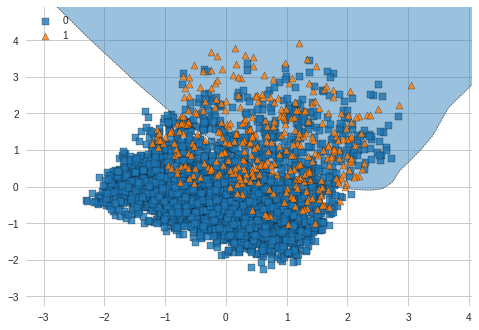

In [18]:
plot_decision_regions(X_Train, Y_Train, clf=model, legend=2)

# Working with more than 2 dimensions
# value=1.5
# width=0.75
# plot_decision_regions(X_Train, Y_Train, clf=model, legend=2, feature_index=[0,2],
#                       filler_feature_values={1: value, 3:value, 4: value, 5:value, 
#                                              6: value, 7:value, 8: value, 9:value, 
#                                              10: value, 11: value, 12:value},
#                       filler_feature_ranges={1: width, 3: width, 4: width, 5: width, 
#                                              6: width, 7: width, 8: width, 9: width, 
#                                              10: width, 11: width, 12: width})

plt.show()

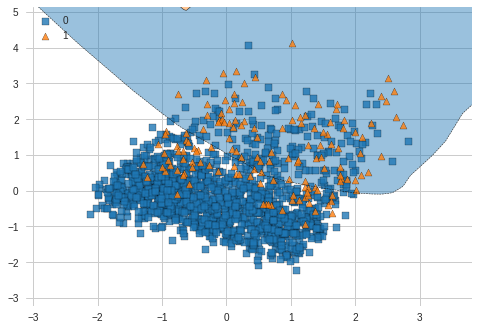

In [19]:
plot_decision_regions(X_Test, Y_Test, clf=model, legend=2)
plt.show()

### Neural Network Animated Decision Boundary

In [20]:
# Following https://towardsdatascience.com/simple-method-of-creating-animated-graphs-127c11f58cc5
# boundary of the graph
GRID_X_START = -7
GRID_X_END = 9
GRID_Y_START = -1.0
GRID_Y_END = 8.5
# output directory (the folder must be created on the drive)
OUTPUT_DIR = "./"
grid = np.mgrid[GRID_X_START:GRID_X_END:100j,GRID_X_START:GRID_Y_END:100j]
grid_2d = grid.reshape(2, -1).T
XX, YY = grid

In [21]:
# the function making up the graph of a dataset
def make_plot(X, y, plot_name, file_name=None, XX=None, YY=None, preds=None, dark=False):
    if (dark):
        plt.style.use('dark_background')
    else:
        sns.set_style("whitegrid")
    plt.figure(figsize=(16,12))
    axes = plt.gca()
    axes.set(xlabel="$X_1$", ylabel="$X_2$")
    plt.title(plot_name, fontsize=30)
    plt.subplots_adjust(left=0.20)
    plt.subplots_adjust(right=0.80)
    if(XX is not None and YY is not None and preds is not None):
        plt.contourf(XX, YY, preds[:,0].reshape(XX.shape), 25, alpha = 1, cmap=cm.Spectral)
        plt.contour(XX, YY, preds[:,0].reshape(XX.shape), levels=[.5], cmap="Greys", vmin=0, vmax=.6)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='black')
    if(file_name):
        plt.savefig(file_name)
        plt.close()

In [22]:
def make_gif(input_folder, save_filepath):
    episode_frames = []
    time_per_step = 0.25
    for root, _, files in os.walk(input_folder):
        file_paths = [os.path.join(root, file) for file in files]
        #sorted by modified time
        file_paths = sorted(file_paths, key=lambda x: os.path.getmtime(x))
        episode_frames = [imageio.imread(file_path) for file_path in file_paths if file_path.endswith('.png')]
    episode_frames = np.array(episode_frames)
    imageio.mimsave(save_filepath, episode_frames, duration=time_per_step)

In [23]:
import seaborn as sns
from matplotlib import cm

def callback_keras_plot(epoch, logs):
    plot_title = "Keras Model - It: {:05}".format(epoch)
    file_name = "keras_model_{:05}.png".format(epoch)
    file_path = os.path.join(OUTPUT_DIR, file_name)
    prediction_probs = model.predict_proba(grid_2d, batch_size=32, verbose=0)
    make_plot(X_Test, Y_Test, plot_title, file_name=file_path, XX=XX, YY=YY, preds=prediction_probs)
    
# Adding callback functions that they will run in every epoch
testmodelcb = keras.callbacks.LambdaCallback(on_epoch_end=callback_keras_plot)

# Building a model
model = Sequential()
model.add(Dense(25, input_dim=2,activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

# Training
history = model.fit(X_Train, Y_Train, epochs= 118, callbacks=[testmodelcb])

Epoch 1/118
3500/3500 [==============================] - 0s 87us/step - loss: 0.5962 - accuracy: 0.8637


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning:

No contour levels were found within the data range.



Epoch 2/118
3500/3500 [==============================] - 0s 49us/step - loss: 0.4539 - accuracy: 0.9046
Epoch 3/118
3500/3500 [==============================] - 0s 50us/step - loss: 0.3715 - accuracy: 0.9046
Epoch 4/118
3500/3500 [==============================] - 0s 54us/step - loss: 0.3230 - accuracy: 0.9046
Epoch 5/118
3500/3500 [==============================] - 0s 51us/step - loss: 0.2927 - accuracy: 0.9046
Epoch 6/118
3500/3500 [==============================] - 0s 54us/step - loss: 0.2696 - accuracy: 0.9046
Epoch 7/118
3500/3500 [==============================] - 0s 54us/step - loss: 0.2527 - accuracy: 0.9046
Epoch 8/118
3500/3500 [==============================] - 0s 51us/step - loss: 0.2415 - accuracy: 0.9049
Epoch 9/118
3500/3500 [==============================] - 0s 54us/step - loss: 0.2343 - accuracy: 0.9046
Epoch 10/118
3500/3500 [==============================] - 0s 52us/step - loss: 0.2295 - accuracy: 0.9054
Epoch 11/118
3500/3500 [==============================] - 0s 52

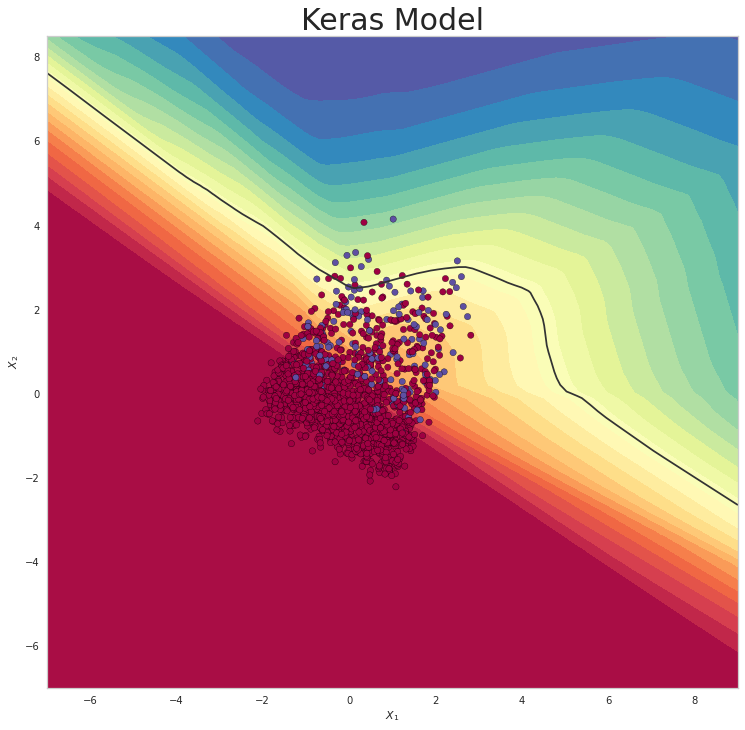

In [24]:
prediction_probs = model.predict_proba(grid_2d, batch_size=32, verbose=0)
make_plot(X_Test, Y_Test, "Keras Model", file_name=None, XX=XX, YY=YY, preds=prediction_probs)

In [25]:
import imageio

input_folder = './'
save_filepath = './Keras_gif.gif'
make_gif(input_folder, save_filepath)